In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df_torch = pd.read_csv('./ML_Model_Training/Data/torch_issues_classified_new.csv')
df_tf = pd.read_csv('./ML_Model_Training/Data/tf_issues_classified_new.csv')

In [151]:
# Delete duplicated rows
df_torch = df_torch.drop_duplicates()
df_tf = df_tf.drop_duplicates()


# Understanding and Releasing Results for Closed Issues 

## PyTorch Results

In [152]:
df_torch['Time created'].isnull().sum()

0

In [153]:
df_torch.loc[:, 'Time created'] = pd.to_datetime(df_torch['Time created']).dt.strftime('%Y-%m-%d')
df_torch.loc[:, 'Final_Is_Bug'] = df_torch['Final_Is_Bug'].astype(int)


In [154]:
#sort by date the df_torch
df_torch_sorted = df_torch.sort_values(by=['Time created'])

### Issue Response Time

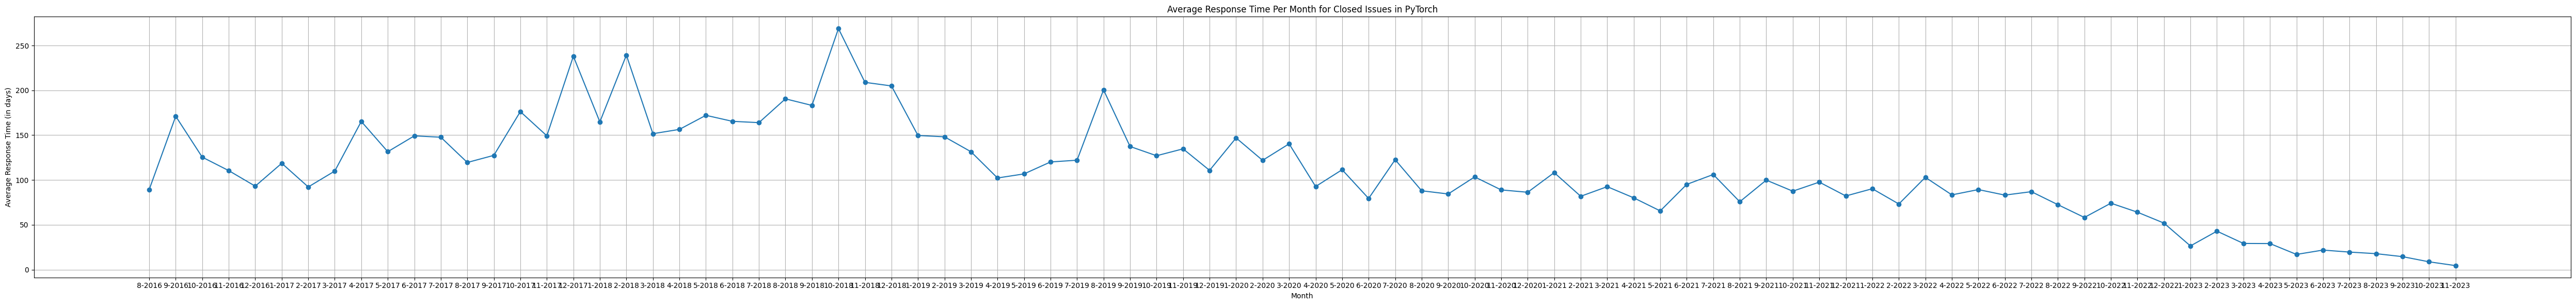

In [155]:
# Assuming df_torch_sorted is already sorted by 'Time created' -- >MONTH
df_torch_sorted['Time created'] = pd.to_datetime(df_torch_sorted['Time created']).dt.tz_localize(None)
df_torch_sorted['Time closed'] = pd.to_datetime(df_torch_sorted['Time closed']).dt.tz_localize(None)

# Calculate the response time for each bug in days
df_torch_sorted['Response Time'] = (df_torch_sorted['Time closed'] - df_torch_sorted['Time created']).dt.total_seconds() / (24 * 60 * 60)

# Group by year and month and calculate the average response time
avg_response_time_per_month = df_torch_sorted.groupby([df_torch_sorted['Time created'].dt.year, df_torch_sorted['Time created'].dt.month])['Response Time'].mean()

# Create subplots
fig, ax = plt.subplots(figsize=(50, 6))

# Plotting
x_values = [f'{month}-{year}' for year, month in avg_response_time_per_month.index]
y_values = avg_response_time_per_month.values
ax.plot(x_values, y_values, marker='o')

# Set titles and labels
ax.set_title('Average Response Time Per Month for Closed Issues in PyTorch')
ax.set_xlabel('Month')
ax.set_ylabel('Average Response Time (in days)')
ax.grid(True)

plt.tight_layout()
plt.show()

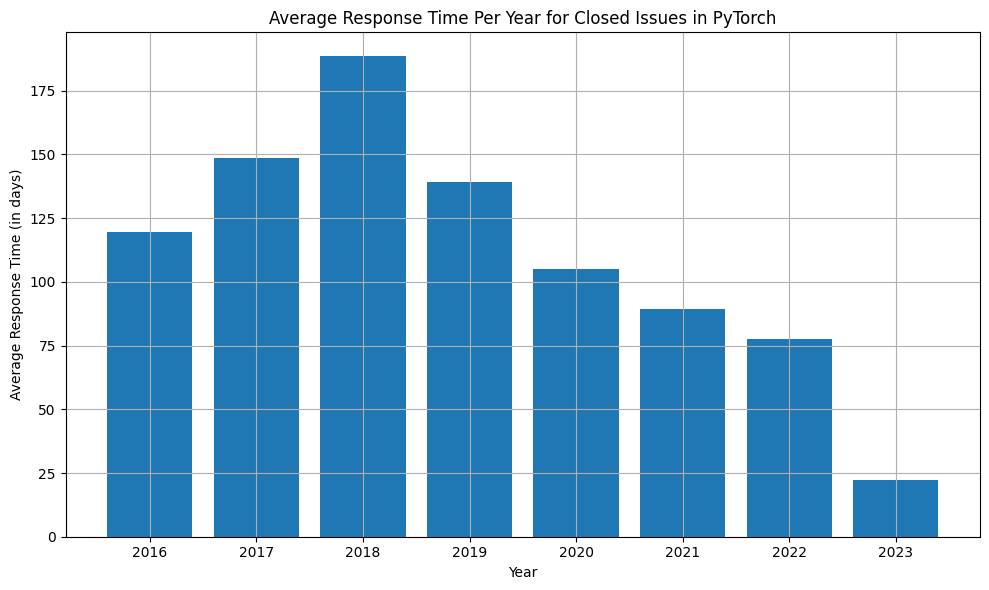

In [156]:
# Assuming df_torch_sorted is already sorted by 'Time created' -- >YEAR
df_torch_sorted['Time created'] = pd.to_datetime(df_torch_sorted['Time created']).dt.tz_localize(None)
df_torch_sorted['Time closed'] = pd.to_datetime(df_torch_sorted['Time closed']).dt.tz_localize(None)

# Calculate the response time for each bug in days
df_torch_sorted['Response Time'] = (df_torch_sorted['Time closed'] - df_torch_sorted['Time created']).dt.total_seconds() / (24 * 60 * 60)

# Group by year and calculate the average response time
avg_response_time_per_year = df_torch_sorted.groupby(df_torch_sorted['Time created'].dt.year)['Response Time'].mean()

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting
x_values = avg_response_time_per_year.index
y_values = avg_response_time_per_year.values
ax.bar(x_values, y_values)

# Set titles and labels
ax.set_title('Average Response Time Per Year for Closed Issues in PyTorch')
ax.set_xlabel('Year')
ax.set_ylabel('Average Response Time (in days)')
ax.grid(True)

plt.tight_layout()
plt.show()

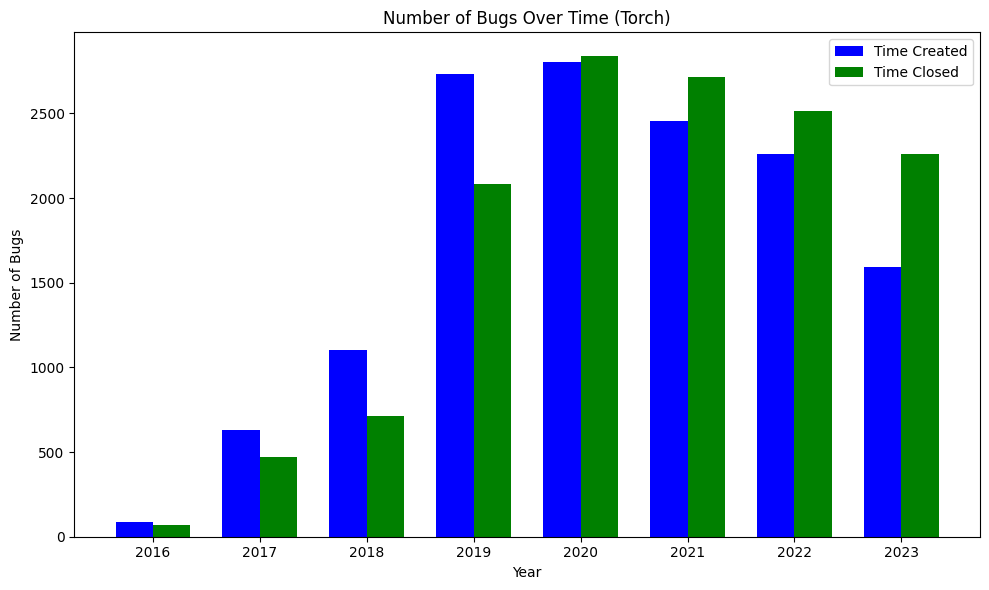

In [157]:
import matplotlib.pyplot as plt

# Assuming df_torch_sorted is already sorted by 'Time created'
df_torch_sorted['Time created'] = pd.to_datetime(df_torch_sorted['Time created'])
df_torch_sorted['Time closed'] = pd.to_datetime(df_torch_sorted['Time closed'])

# Group by year and count the number of bugs for Time Created
bugs_per_year_created = df_torch_sorted[df_torch_sorted['Final_Is_Bug'] == 1].groupby(df_torch_sorted['Time created'].dt.year).size()

# Group by year and count the number of bugs for Time Closed
bugs_per_year_closed = df_torch_sorted[df_torch_sorted['Final_Is_Bug'] == 1].groupby(df_torch_sorted['Time closed'].dt.year).size()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the width of each bar
bar_width = 0.35

# Calculate the x positions for the bars
x = np.arange(len(bugs_per_year_created.index))

# Plotting for Time Created
ax.bar(x - bar_width/2, bugs_per_year_created.values, width=bar_width, color='blue', label='Time Created')

# Plotting for Time Closed
ax.bar(x + bar_width/2, bugs_per_year_closed.values, width=bar_width, color='green', label='Time Closed')

# Set titles and labels
ax.set_title('Number of Bugs Over Time (Torch)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Bugs')
ax.set_xticks(x)
ax.set_xticklabels(bugs_per_year_created.index)
ax.legend()

plt.tight_layout()
plt.show()


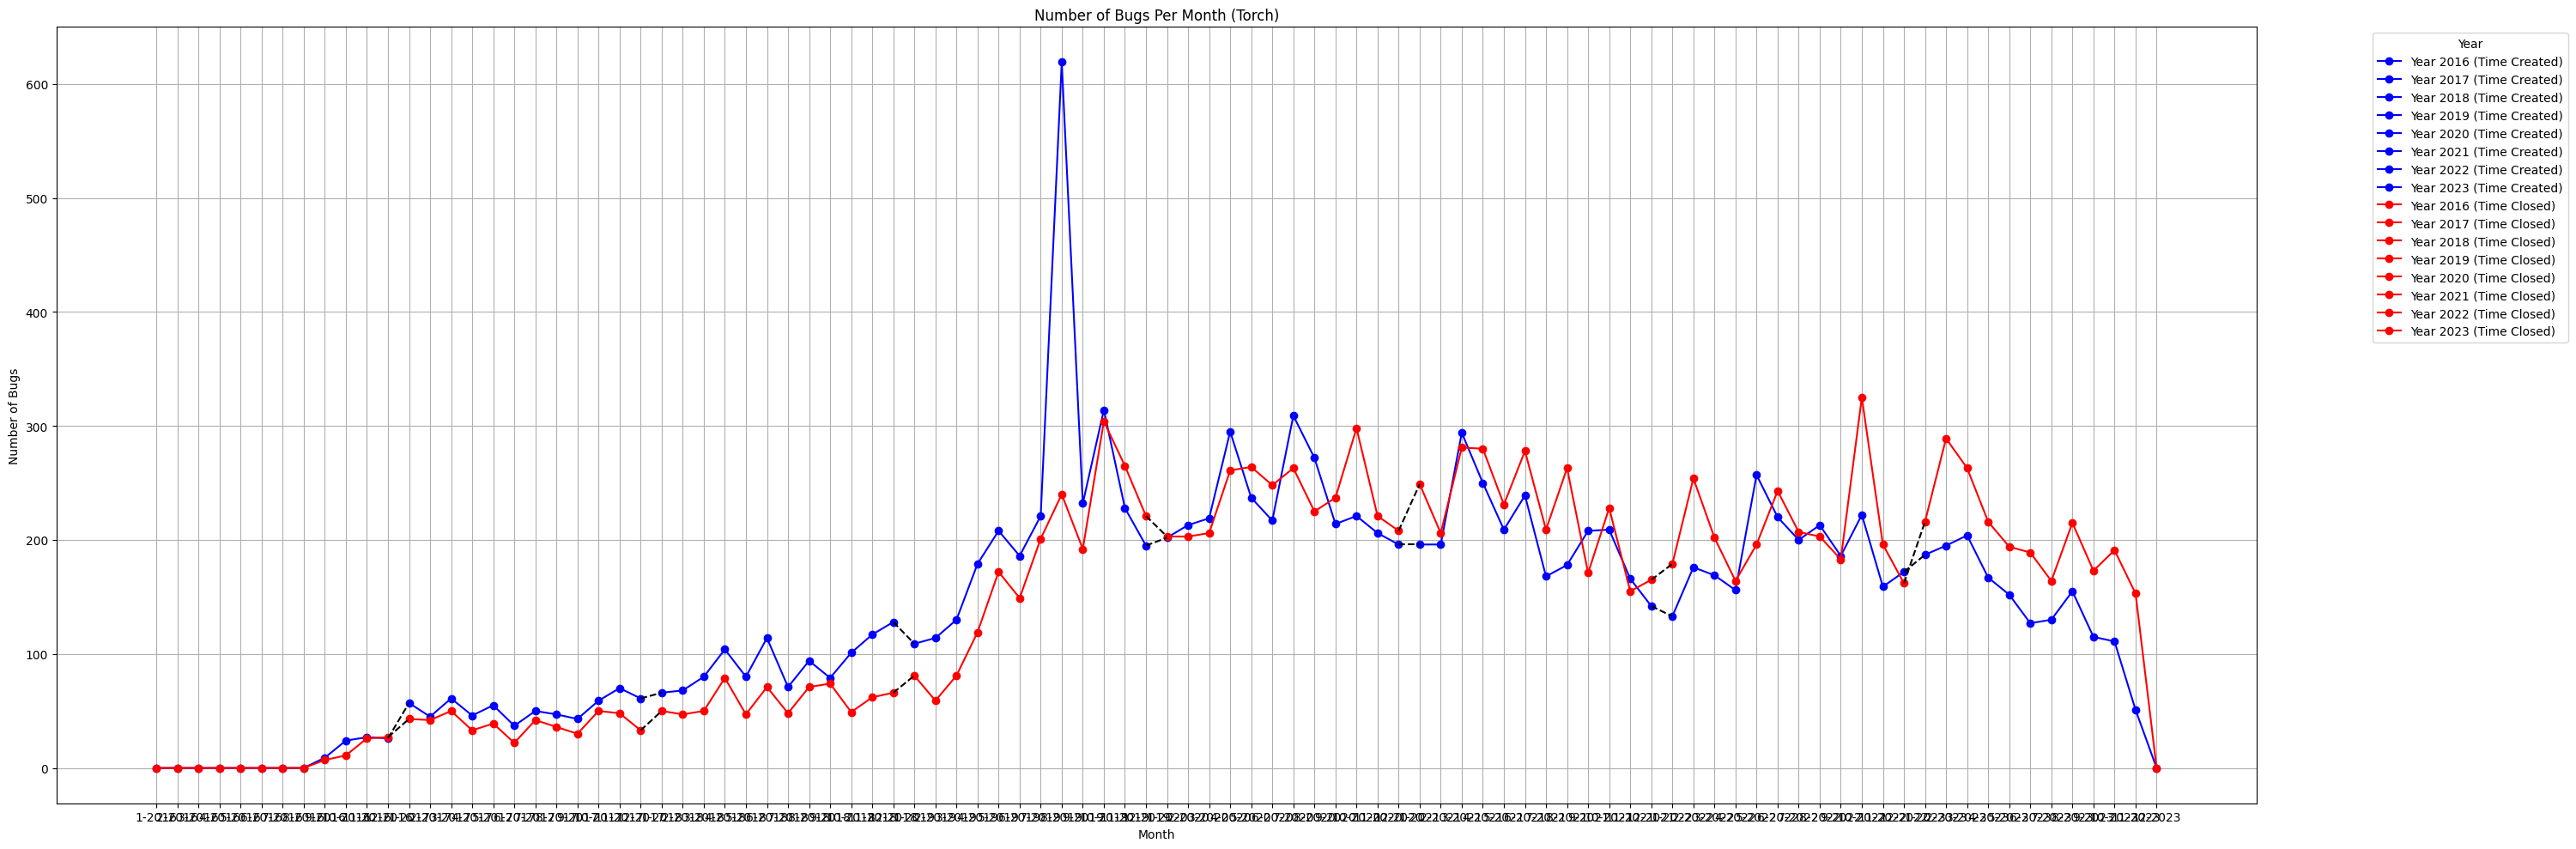

In [158]:
# Create subplots
fig, ax = plt.subplots(figsize=(30, 10))

# Assuming df_torch_sorted is already sorted by 'Time created'
df_torch_sorted['Time created'] = pd.to_datetime(df_torch_sorted['Time created'])
df_torch_sorted['Time closed'] = pd.to_datetime(df_torch_sorted['Time closed'])

# Group by year and month and count the number of bugs for Time Created
bugs_per_month_created = df_torch_sorted[df_torch_sorted['Final_Is_Bug'] == 1].groupby([df_torch_sorted['Time created'].dt.year, df_torch_sorted['Time created'].dt.month]).size()

# Group by year and month and count the number of bugs for Time Closed
bugs_per_month_closed = df_torch_sorted[df_torch_sorted['Final_Is_Bug'] == 1].groupby([df_torch_sorted['Time closed'].dt.year, df_torch_sorted['Time closed'].dt.month]).size()

# Sort the bugs_per_month_created DataFrame by month in ascending order
bugs_per_month_created = bugs_per_month_created.sort_index()
bugs_per_month_closed = bugs_per_month_closed.sort_index()

# Plotting for Time Created
for year in bugs_per_month_created.index.get_level_values(0).unique():
    x_values = [f'{month}-{year}' for month in range(1, 13)]  # Add all months of the year
    y_values = [bugs_per_month_created.loc[year].get(month, 0) for month in range(1, 13)]  # Get bug count for each month, fill missing months with 0 bugs
    ax.plot(x_values, y_values, label=f'Year {year} (Time Created)', marker='o', color='blue')

# Plotting for Time Closed
for year in bugs_per_month_closed.index.get_level_values(0).unique():
    x_values = [f'{month}-{year}' for month in range(1, 13)]  # Add all months of the year
    y_values = [bugs_per_month_closed.loc[year].get(month, 0) for month in range(1, 13)]  # Get bug count for each month, fill missing months with 0 bugs
    ax.plot(x_values, y_values, label=f'Year {year} (Time Closed)', marker='o', color='red')

# Connect the months between different years for Time Created
for i in range(len(bugs_per_month_created.index.get_level_values(0).unique()) - 1):
    current_year = bugs_per_month_created.index.get_level_values(0).unique()[i]
    next_year = bugs_per_month_created.index.get_level_values(0).unique()[i + 1]
    current_year_last_month = bugs_per_month_created.loc[current_year].index.max()
    next_year_first_month = bugs_per_month_created.loc[next_year].index.min()
    x_values = [f'{current_year_last_month}-{current_year}', f'{next_year_first_month}-{next_year}']
    y_values = [bugs_per_month_created.loc[current_year].get(current_year_last_month, 0), bugs_per_month_created.loc[next_year].get(next_year_first_month, 0)]
    ax.plot(x_values, y_values, color='black', linestyle='--')

# Connect the months between different years for Time Closed
for i in range(len(bugs_per_month_closed.index.get_level_values(0).unique()) - 1):
    current_year = bugs_per_month_closed.index.get_level_values(0).unique()[i]
    next_year = bugs_per_month_closed.index.get_level_values(0).unique()[i + 1]
    current_year_last_month = bugs_per_month_closed.loc[current_year].index.max()
    next_year_first_month = bugs_per_month_closed.loc[next_year].index.min()
    x_values = [f'{current_year_last_month}-{current_year}', f'{next_year_first_month}-{next_year}']
    y_values = [bugs_per_month_closed.loc[current_year].get(current_year_last_month, 0), bugs_per_month_closed.loc[next_year].get(next_year_first_month, 0)]
    ax.plot(x_values, y_values, color='black', linestyle='--')

# Set titles and labels
ax.set_title('Number of Bugs Per Month (Torch)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Bugs')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)

plt.tight_layout()
plt.show()

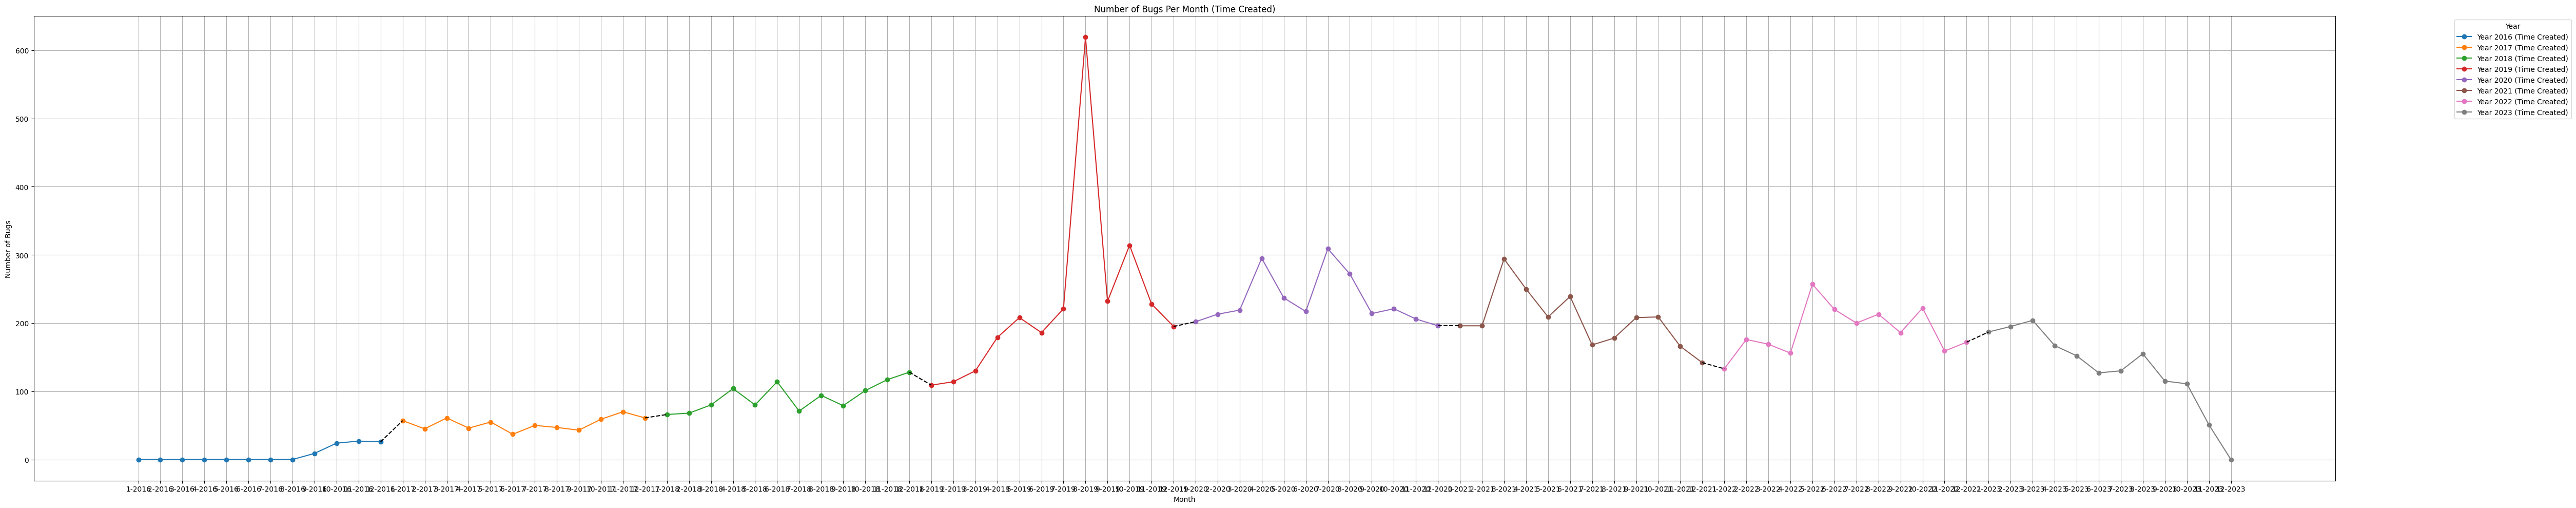

In [159]:
# Assuming df_torch_sorted is already sorted by 'Time created'
df_torch_sorted['Time created'] = pd.to_datetime(df_torch_sorted['Time created'])

# Group by year and month and count the number of bugs for Time Created
bugs_per_month_created = df_torch_sorted[df_torch_sorted['Final_Is_Bug'] == 1].groupby([df_torch_sorted['Time created'].dt.year, df_torch_sorted['Time created'].dt.month]).size()

# Create subplots
fig, ax = plt.subplots(figsize=(50, 10))

# Plotting for Time Created
for year in bugs_per_month_created.index.get_level_values(0).unique():
    x_values = [f'{month}-{year}' for month in range(1, 13)]  # Add all months of the year
    y_values = [bugs_per_month_created.loc[year].get(month, 0) for month in range(1, 13)]  # Get bug count for each month, fill missing months with 0 bugs
    ax.plot(x_values, y_values, label=f'Year {year} (Time Created)', marker='o')

# Connect the months between different years for Time Created
for i in range(len(bugs_per_month_created.index.get_level_values(0).unique()) - 1):
    current_year = bugs_per_month_created.index.get_level_values(0).unique()[i]
    next_year = bugs_per_month_created.index.get_level_values(0).unique()[i + 1]
    current_year_last_month = bugs_per_month_created.loc[current_year].index.max()
    next_year_first_month = bugs_per_month_created.loc[next_year].index.min()
    x_values = [f'{current_year_last_month}-{current_year}', f'{next_year_first_month}-{next_year}']
    y_values = [bugs_per_month_created.loc[current_year].get(current_year_last_month, 0), bugs_per_month_created.loc[next_year].get(next_year_first_month, 0)]
    ax.plot(x_values, y_values, color='black', linestyle='--')

# Set titles and labels
ax.set_title('Number of Bugs Per Month (Time Created)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Bugs')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)

plt.tight_layout()
plt.show()

## TensorFlow Results

In [160]:
df_tf['Time closed'].isnull().sum()

0

In [161]:
df_tf['Time created'] = pd.to_datetime(df_tf['Time created'])
df_tf['Time closed'] = pd.to_datetime(df_tf['Time closed']).dt.strftime('%Y-%m-%d')

In [162]:
#Graph the number of bugs over time
df_tf['Time created'] = pd.to_datetime(df_tf['Time created'])
df_tf['Time created'] = df_tf['Time created'].dt.strftime('%Y-%m-%d')
df_tf['Final_Is_Bug'] = df_tf['Final_Is_Bug'].astype(int)

In [163]:
#sort by date the df_torch
df_tf_sorted = df_tf.sort_values(by=['Time created'])

### Issue Response Time 

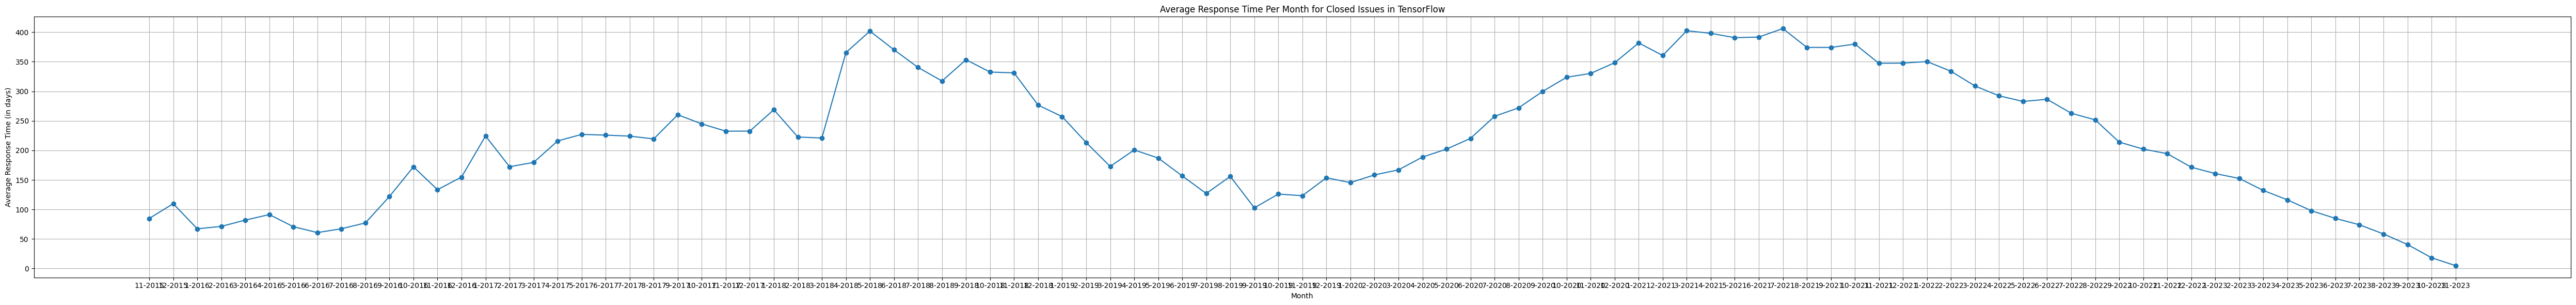

In [164]:
# Assuming df_tf_sorted is already sorted by 'Time created' -- >MONTH
df_tf_sorted['Time created'] = pd.to_datetime(df_tf_sorted['Time created']).dt.tz_localize(None)
df_tf_sorted['Time closed'] = pd.to_datetime(df_tf_sorted['Time closed']).dt.tz_localize(None)

# Calculate the response time for each bug in days
df_tf_sorted['Response Time'] = (df_tf_sorted['Time closed'] - df_tf_sorted['Time created']).dt.total_seconds() / (24 * 60 * 60)

# Group by year and month and calculate the average response time
avg_response_time_per_month = df_tf_sorted.groupby([df_tf_sorted['Time created'].dt.year, df_tf_sorted['Time created'].dt.month])['Response Time'].mean()

# Create subplots
fig, ax = plt.subplots(figsize=(50, 6))

# Plotting
x_values = [f'{month}-{year}' for year, month in avg_response_time_per_month.index]
y_values = avg_response_time_per_month.values
ax.plot(x_values, y_values, marker='o')

# Set titles and labels
ax.set_title('Average Response Time Per Month for Closed Issues in TensorFlow')
ax.set_xlabel('Month')
ax.set_ylabel('Average Response Time (in days)')
ax.grid(True)

plt.tight_layout()
plt.show()

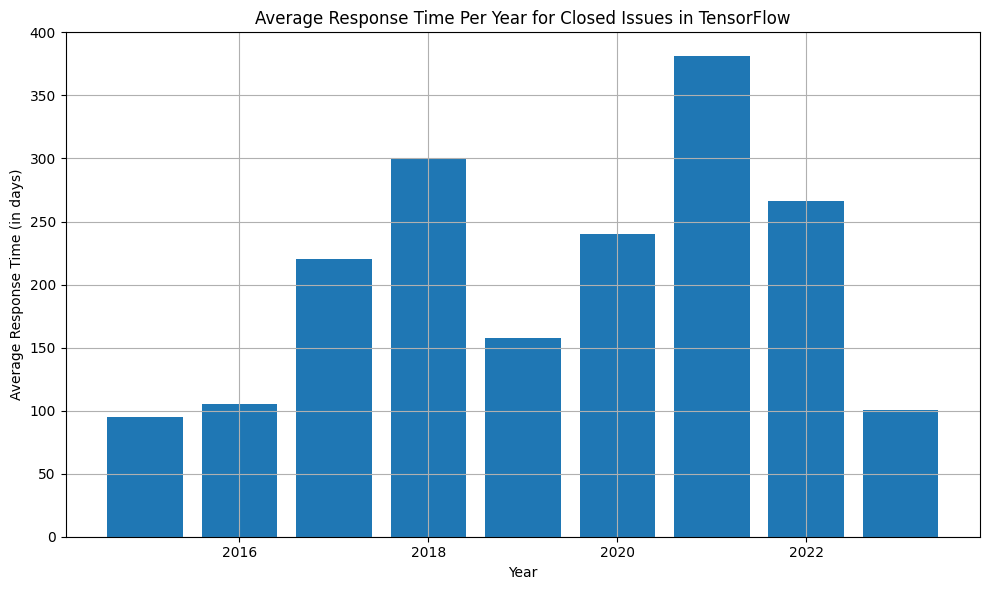

In [165]:
# Assuming df_torch_sorted is already sorted by 'Time created' -- >YEAR
df_tf_sorted['Time created'] = pd.to_datetime(df_tf_sorted['Time created']).dt.tz_localize(None)
df_tf_sorted['Time closed'] = pd.to_datetime(df_tf_sorted['Time closed']).dt.tz_localize(None)

# Calculate the response time for each bug in days
df_tf_sorted['Response Time'] = (df_tf_sorted['Time closed'] - df_tf_sorted['Time created']).dt.total_seconds() / (24 * 60 * 60)

# Group by year and calculate the average response time
avg_response_time_per_year = df_tf_sorted.groupby(df_tf_sorted['Time created'].dt.year)['Response Time'].mean()

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting
x_values = avg_response_time_per_year.index
y_values = avg_response_time_per_year.values
ax.bar(x_values, y_values)

# Set titles and labels
ax.set_title('Average Response Time Per Year for Closed Issues in TensorFlow')
ax.set_xlabel('Year')
ax.set_ylabel('Average Response Time (in days)')
ax.grid(True)

plt.tight_layout()
plt.show()

### The Closed Bugs for time created and time closed

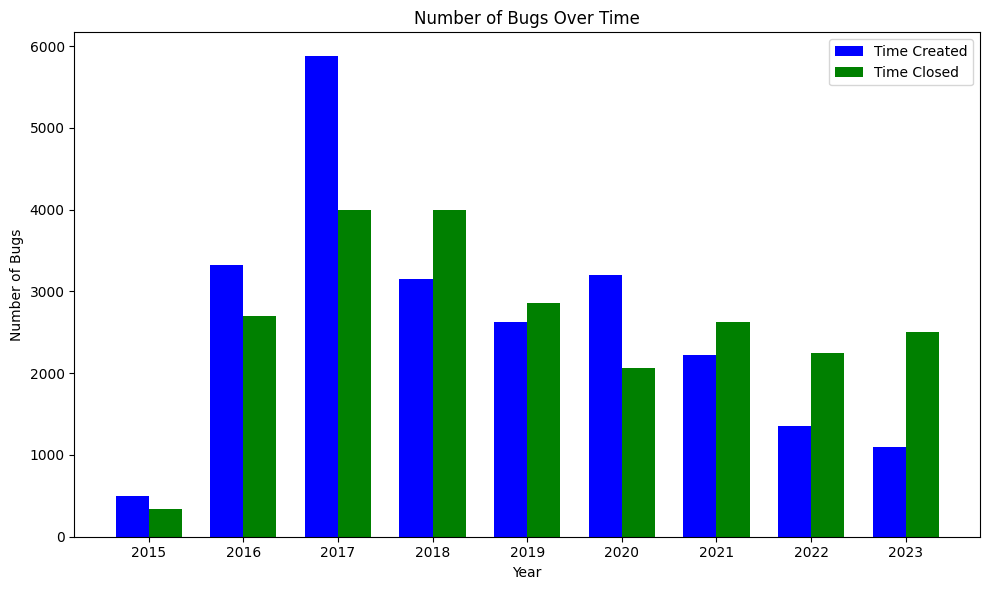

In [166]:
# Assuming df_tf_sorted is already sorted by 'Time created'
df_tf_sorted['Time created'] = pd.to_datetime(df_tf_sorted['Time created'])
df_tf_sorted['Time closed'] = pd.to_datetime(df_tf_sorted['Time closed'])

# Group by year and count the number of bugs for Time Created
bugs_per_year_created = df_tf_sorted[df_tf_sorted['Final_Is_Bug'] == 1].groupby(df_tf_sorted['Time created'].dt.year).size()

# Group by year and count the number of bugs for Time Closed
bugs_per_year_closed = df_tf_sorted[df_tf_sorted['Final_Is_Bug'] == 1].groupby(df_tf_sorted['Time closed'].dt.year).size()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the width of each bar
bar_width = 0.35

# Calculate the x positions for the bars
x = np.arange(len(bugs_per_year_created.index))

# Plotting for Time Created
ax.bar(x - bar_width/2, bugs_per_year_created.values, width=bar_width, color='blue', label='Time Created')

# Plotting for Time Closed
ax.bar(x + bar_width/2, bugs_per_year_closed.values, width=bar_width, color='green', label='Time Closed')

# Set titles and labels
ax.set_title('Number of Bugs Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Bugs')
ax.set_xticks(x)
ax.set_xticklabels(bugs_per_year_created.index)
ax.legend()

plt.tight_layout()
plt.show()


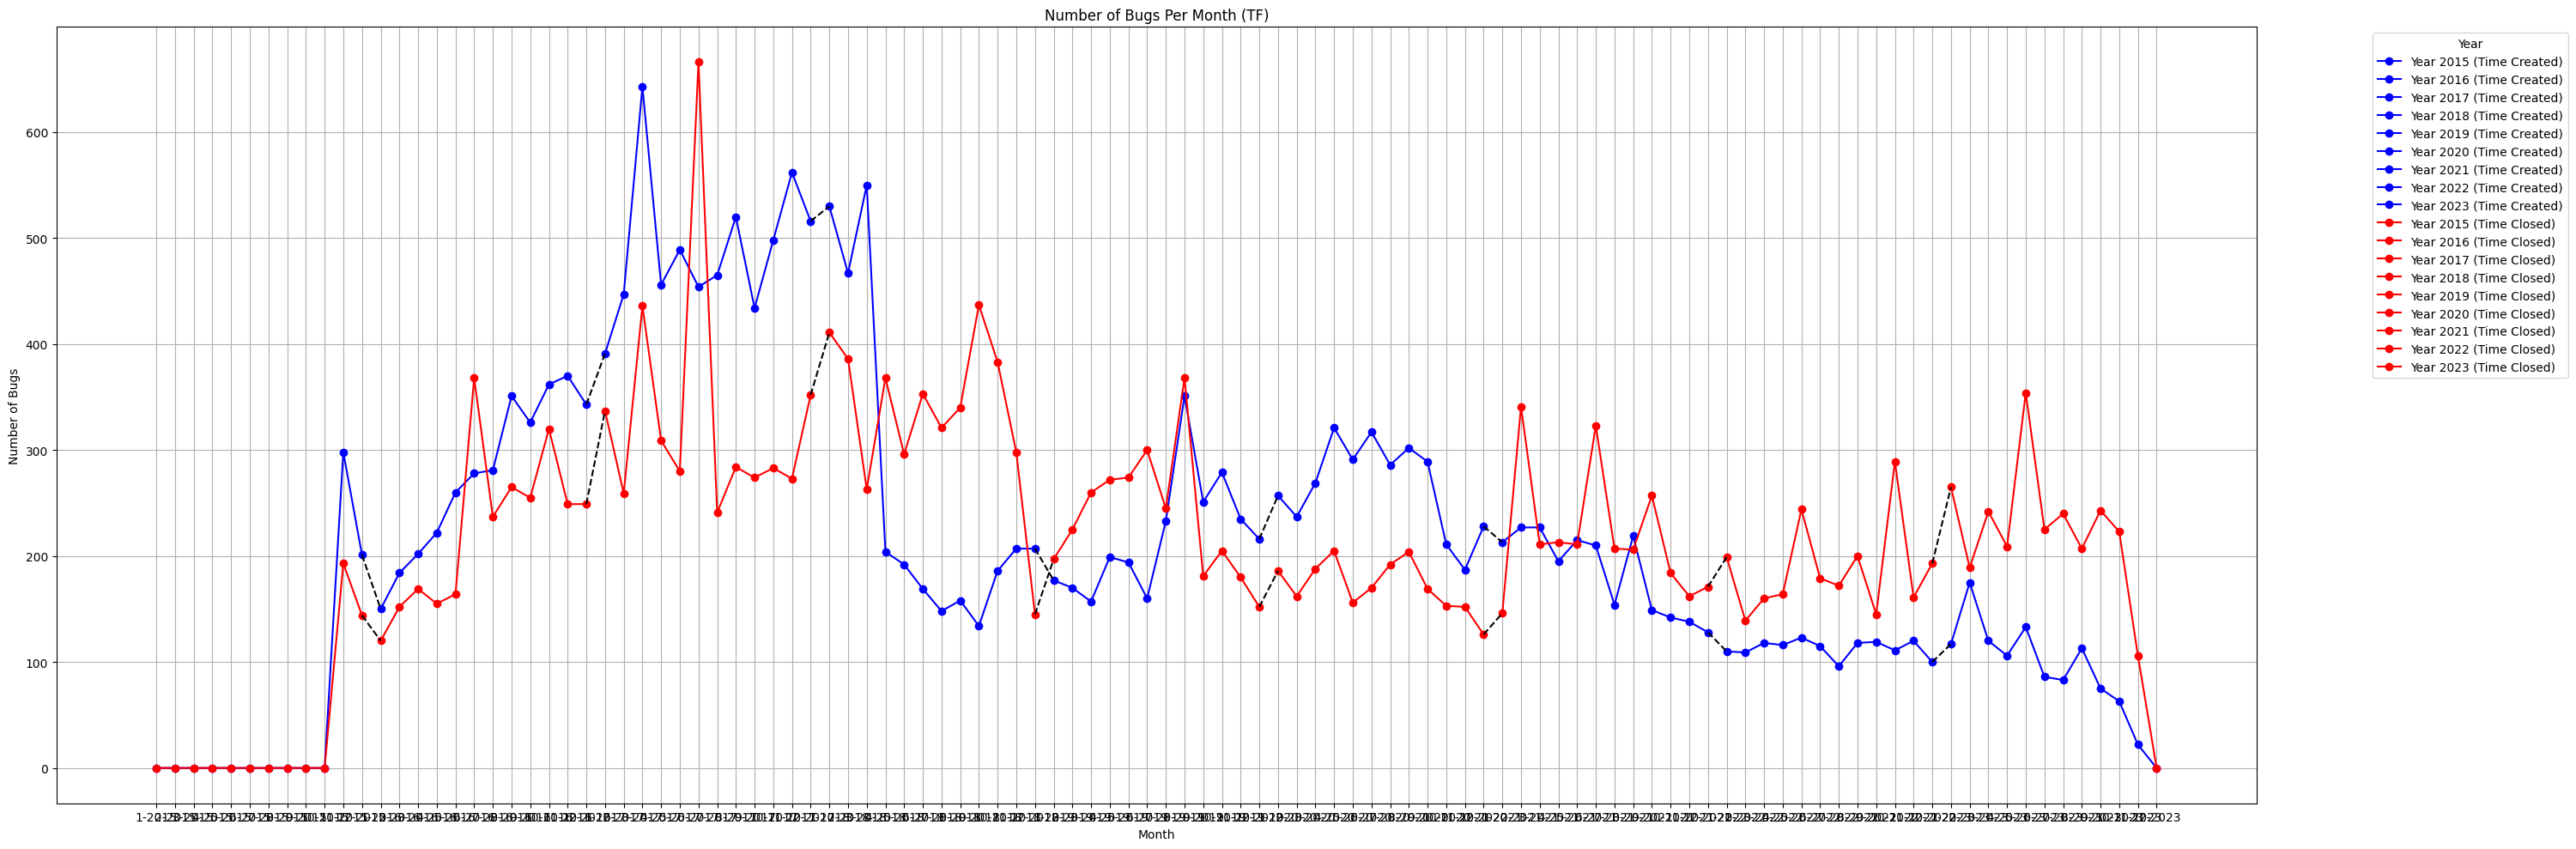

In [167]:
# Assuming df_tf_sorted is already sorted by 'Time created'
df_tf_sorted['Time created'] = pd.to_datetime(df_tf_sorted['Time created'])
df_tf_sorted['Time closed'] = pd.to_datetime(df_tf_sorted['Time closed'])

# Group by year and month and count the number of bugs for Time Created
bugs_per_month_created = df_tf_sorted[df_tf_sorted['Final_Is_Bug'] == 1].groupby([df_tf_sorted['Time created'].dt.year, df_tf_sorted['Time created'].dt.month]).size()

# Group by year and month and count the number of bugs for Time Closed
bugs_per_month_closed = df_tf_sorted[df_tf_sorted['Final_Is_Bug'] == 1].groupby([df_tf_sorted['Time closed'].dt.year, df_tf_sorted['Time closed'].dt.month]).size()

# Create subplots
fig, ax = plt.subplots(figsize=(30, 10))

# Plotting for Time Created
for year in bugs_per_month_created.index.get_level_values(0).unique():
    x_values = [f'{month}-{year}' for month in range(1, 13)]  # Add all months of the year
    y_values = [bugs_per_month_created.loc[year].get(month, 0) for month in range(1, 13)]  # Get bug count for each month, fill missing months with 0 bugs
    ax.plot(x_values, y_values, label=f'Year {year} (Time Created)', marker='o', color='blue')

# Plotting for Time Closed
for year in bugs_per_month_closed.index.get_level_values(0).unique():
    x_values = [f'{month}-{year}' for month in range(1, 13)]  # Add all months of the year
    y_values = [bugs_per_month_closed.loc[year].get(month, 0) for month in range(1, 13)]  # Get bug count for each month, fill missing months with 0 bugs
    ax.plot(x_values, y_values, label=f'Year {year} (Time Closed)', marker='o', color='red')

# Connect the months between different years for Time Created
for i in range(len(bugs_per_month_created.index.get_level_values(0).unique()) - 1):
    current_year = bugs_per_month_created.index.get_level_values(0).unique()[i]
    next_year = bugs_per_month_created.index.get_level_values(0).unique()[i + 1]
    current_year_last_month = bugs_per_month_created.loc[current_year].index.max()
    next_year_first_month = bugs_per_month_created.loc[next_year].index.min()
    x_values = [f'{current_year_last_month}-{current_year}', f'{next_year_first_month}-{next_year}']
    y_values = [bugs_per_month_created.loc[current_year].get(current_year_last_month, 0), bugs_per_month_created.loc[next_year].get(next_year_first_month, 0)]
    ax.plot(x_values, y_values, color='black', linestyle='--')

# Connect the months between different years for Time Closed
for i in range(len(bugs_per_month_closed.index.get_level_values(0).unique()) - 1):
    current_year = bugs_per_month_closed.index.get_level_values(0).unique()[i]
    next_year = bugs_per_month_closed.index.get_level_values(0).unique()[i + 1]
    current_year_last_month = bugs_per_month_closed.loc[current_year].index.max()
    next_year_first_month = bugs_per_month_closed.loc[next_year].index.min()
    x_values = [f'{current_year_last_month}-{current_year}', f'{next_year_first_month}-{next_year}']
    y_values = [bugs_per_month_closed.loc[current_year].get(current_year_last_month, 0), bugs_per_month_closed.loc[next_year].get(next_year_first_month, 0)]
    ax.plot(x_values, y_values, color='black', linestyle='--')

# Set titles and labels
ax.set_title('Number of Bugs Per Month (TF)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Bugs')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)

plt.tight_layout()
plt.show()

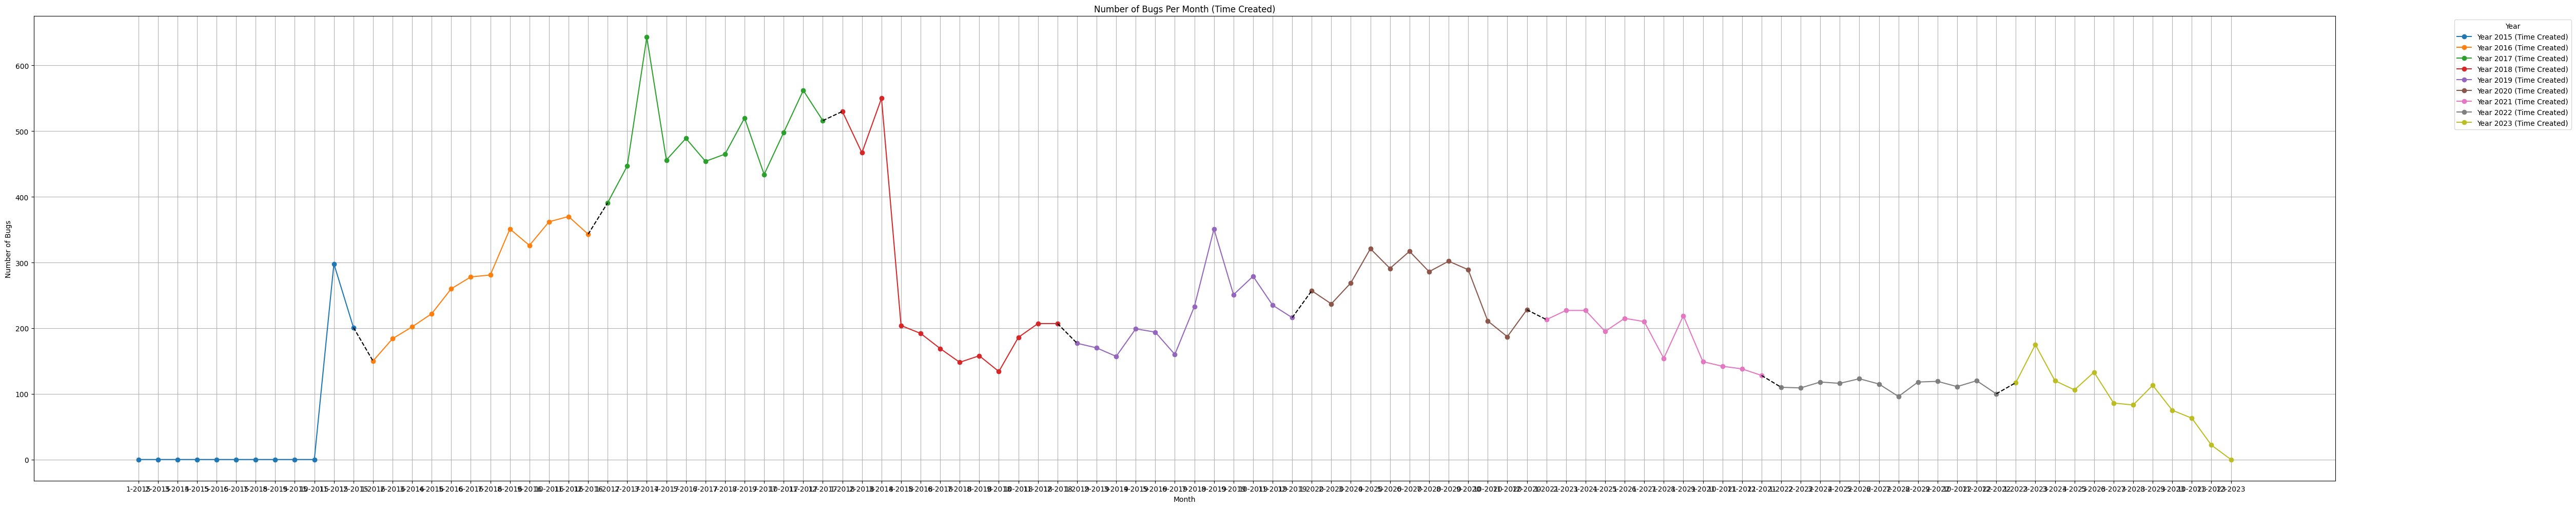

In [168]:
# Assuming df_torch_sorted is already sorted by 'Time created'
df_tf_sorted['Time created'] = pd.to_datetime(df_tf_sorted['Time created'])

# Group by year and month and count the number of bugs for Time Created
bugs_per_month_created = df_tf_sorted[df_tf_sorted['Final_Is_Bug'] == 1].groupby([df_tf_sorted['Time created'].dt.year, df_tf_sorted['Time created'].dt.month]).size()

# Sort the bugs_per_month_created DataFrame by month in ascending order
bugs_per_month_created = bugs_per_month_created.sort_index()

# Create subplots
fig, ax = plt.subplots(figsize=(50, 10))

# Plotting for Time Created
for year in bugs_per_month_created.index.get_level_values(0).unique():
    x_values = [f'{month}-{year}' for month in range(1, 13)]  # Add all months of the year
    y_values = [bugs_per_month_created.loc[year].get(month, 0) for month in range(1, 13)]  # Get bug count for each month, fill missing months with 0 bugs
    ax.plot(x_values, y_values, label=f'Year {year} (Time Created)', marker='o')

# Connect the months between different years for Time Created
for i in range(len(bugs_per_month_created.index.get_level_values(0).unique()) - 1):
    current_year = bugs_per_month_created.index.get_level_values(0).unique()[i]
    next_year = bugs_per_month_created.index.get_level_values(0).unique()[i + 1]
    current_year_last_month = bugs_per_month_created.loc[current_year].index.max()
    next_year_first_month = bugs_per_month_created.loc[next_year].index.min()
    x_values = [f'{current_year_last_month}-{current_year}', f'{next_year_first_month}-{next_year}']
    y_values = [bugs_per_month_created.loc[current_year].get(current_year_last_month, 0), bugs_per_month_created.loc[next_year].get(next_year_first_month, 0)]
    ax.plot(x_values, y_values, color='black', linestyle='--')

# Set titles and labels
ax.set_title('Number of Bugs Per Month (Time Created)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Bugs')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)

plt.tight_layout()
plt.show()

## Issue Response Time for Both TF and Torch

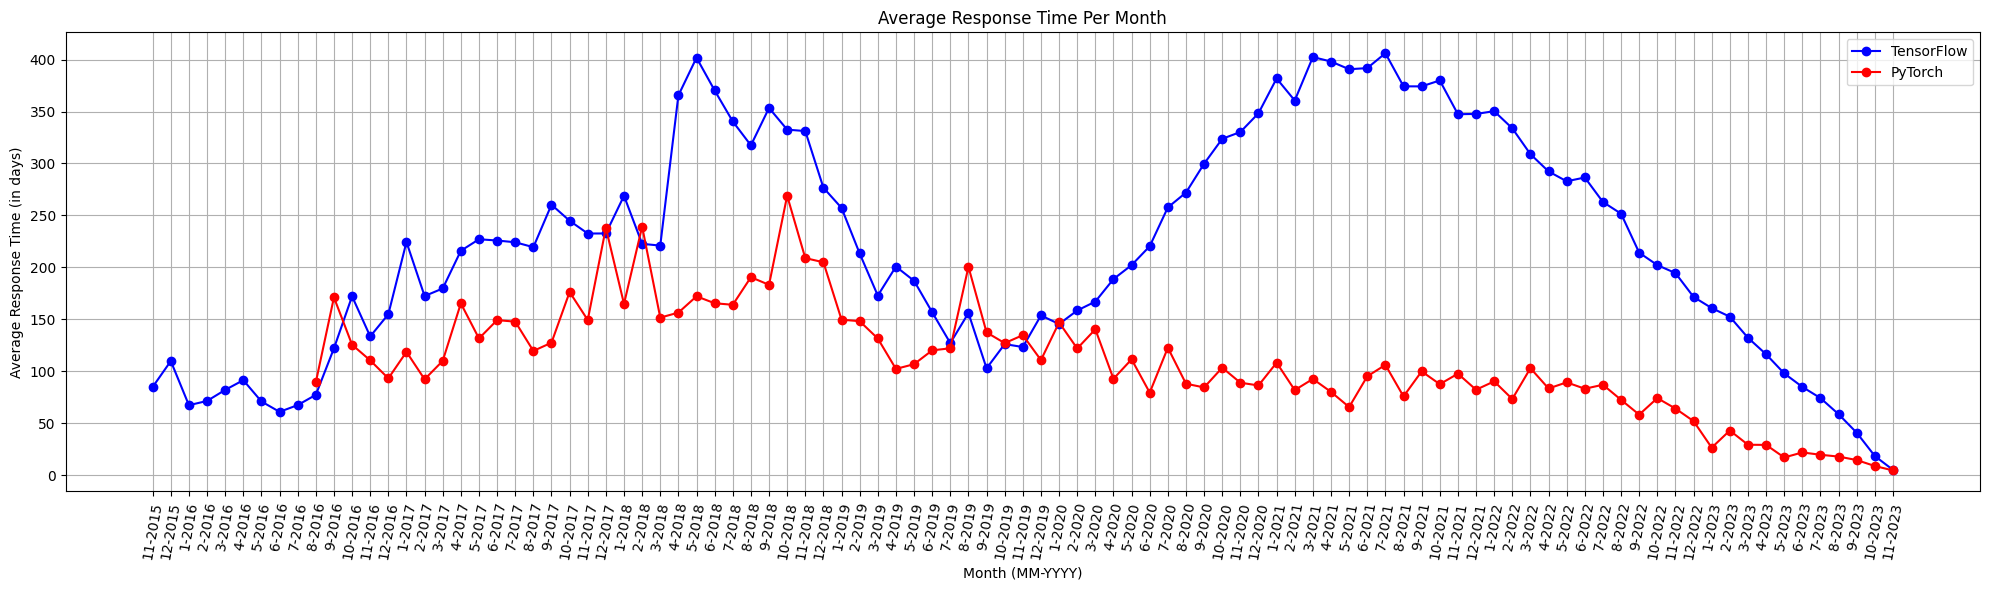

In [169]:
# Assuming df_tf_sorted is already sorted by 'Time created' -- >MONTH
df_tf_sorted['Time created'] = pd.to_datetime(df_tf_sorted['Time created']).dt.tz_localize(None)
df_tf_sorted['Time closed'] = pd.to_datetime(df_tf_sorted['Time closed']).dt.tz_localize(None)

# Calculate the response time for each bug in days
df_tf_sorted['Response Time'] = (df_tf_sorted['Time closed'] - df_tf_sorted['Time created']).dt.total_seconds() / (24 * 60 * 60)

# Assuming df_torch_sorted is already sorted by 'Time created' -- >MONTH
df_torch_sorted['Time created'] = pd.to_datetime(df_torch_sorted['Time created']).dt.tz_localize(None)
df_torch_sorted['Time closed'] = pd.to_datetime(df_torch_sorted['Time closed']).dt.tz_localize(None)

# Calculate the response time for each bug in days
df_torch_sorted['Response Time'] = (df_torch_sorted['Time closed'] - df_torch_sorted['Time created']).dt.total_seconds() / (24 * 60 * 60)

# Group by year and month and calculate the average response time
avg_response_time_per_month_tf = df_tf_sorted.groupby([df_tf_sorted['Time created'].dt.year, df_tf_sorted['Time created'].dt.month])['Response Time'].mean()
avg_response_time_per_month_torch = df_torch_sorted.groupby([df_torch_sorted['Time created'].dt.year, df_torch_sorted['Time created'].dt.month])['Response Time'].mean()

# Create subplots
fig, ax = plt.subplots(figsize=(20, 6))

# Plotting for TensorFlow
x_values_tf = [f'{month}-{year}' for year, month in avg_response_time_per_month_tf.index]
y_values_tf = avg_response_time_per_month_tf.values
ax.plot(x_values_tf, y_values_tf, marker='o', color='blue', label='TensorFlow')

# Plotting for PyTorch
x_values_torch = [f'{month}-{year}' for year, month in avg_response_time_per_month_torch.index]
y_values_torch = avg_response_time_per_month_torch.values
ax.plot(x_values_torch, y_values_torch, marker='o', color='red', label='PyTorch')

# Set titles and labels
ax.set_title('Average Response Time Per Month')
ax.set_xlabel('Month (MM-YYYY)')
ax.set_ylabel('Average Response Time (in days)')
ax.grid(True)
ax.legend()
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

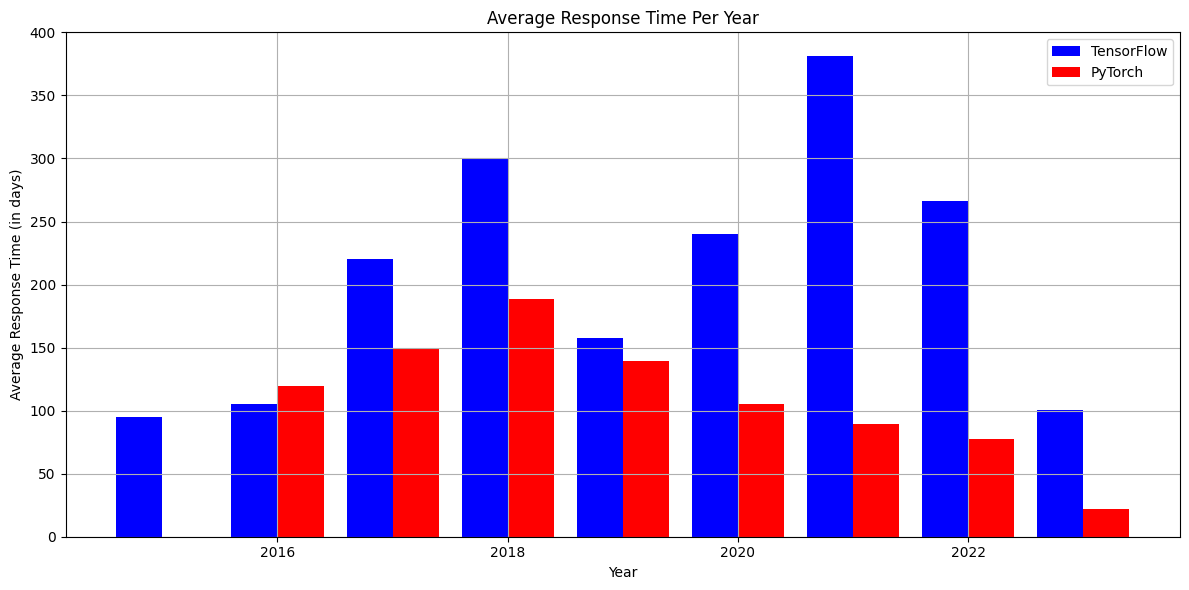

In [170]:
# Assuming df_tf_sorted is already sorted by 'Time created' --> YEAR
df_tf_sorted['Time created'] = pd.to_datetime(df_tf_sorted['Time created']).dt.tz_localize(None)
df_tf_sorted['Time closed'] = pd.to_datetime(df_tf_sorted['Time closed']).dt.tz_localize(None)

# Calculate the response time for each bug in days
df_tf_sorted['Response Time'] = (df_tf_sorted['Time closed'] - df_tf_sorted['Time created']).dt.total_seconds() / (24 * 60 * 60)

# Group by year and calculate the average response time
avg_response_time_per_year_tf = df_tf_sorted.groupby(df_tf_sorted['Time created'].dt.year)['Response Time'].mean()

# Assuming df_torch_sorted is already sorted by 'Time created' --> YEAR
df_torch_sorted['Time created'] = pd.to_datetime(df_torch_sorted['Time created']).dt.tz_localize(None)
df_torch_sorted['Time closed'] = pd.to_datetime(df_torch_sorted['Time closed']).dt.tz_localize(None)

# Calculate the response time for each bug in days
df_torch_sorted['Response Time'] = (df_torch_sorted['Time closed'] - df_torch_sorted['Time created']).dt.total_seconds() / (24 * 60 * 60)

# Group by year and calculate the average response time
avg_response_time_per_year_torch = df_torch_sorted.groupby(df_torch_sorted['Time created'].dt.year)['Response Time'].mean()

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting for df_tf_sorted (Blue)
x_values_tf = avg_response_time_per_year_tf.index
y_values_tf = avg_response_time_per_year_tf.values
ax.bar(x_values_tf - 0.2, y_values_tf, width=0.4, color='blue', label='TensorFlow')

# Plotting for df_torch_sorted (Red)
x_values_torch = avg_response_time_per_year_torch.index
y_values_torch = avg_response_time_per_year_torch.values
ax.bar(x_values_torch + 0.2, y_values_torch, width=0.4, color='red', label='PyTorch')

# Set titles and labels
ax.set_title('Average Response Time Per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Response Time (in days)')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

# Understanding and Releasing the Results for Open Issues (Bugs)

In [171]:
df_tf_closed = df_tf
df_torch_closed = df_torch

df_tf_open = pd.read_csv('./ML_Model_Training/tf_open_issues_classified.csv')
df_torch_open = pd.read_csv('./ML_Model_Training/torch_open_issues_classified.csv')

In [172]:
 #change time created from 2023-12-01 19:27:53+00:00 to 2023-12-01 only
df_tf_open['Time created'] = pd.to_datetime(df_tf_open['Time created']).dt.strftime('%Y-%m-%d')
df_torch_open['Time created'] = pd.to_datetime(df_torch_open['Time created']).dt.strftime('%Y-%m-%d')

In [173]:
#Remove any duplicates
df_tf_open = df_tf_open.drop_duplicates()
df_torch_open = df_torch_open.drop_duplicates()

In [174]:
#Just concat the two dataframes
df_tf = pd.concat([df_tf_closed, df_tf_open])
df_torch = pd.concat([df_torch_closed, df_torch_open])

## Graph for All Issues vs Resolved Ones in Pytorch

In [175]:
#Graph the number of bugs over time
df_torch['Time created'] = pd.to_datetime(df_torch['Time created'])
df_torch['Time created'] = df_torch['Time created'].dt.strftime('%Y-%m-%d')
df_torch['Final_Is_Bug'] = df_torch['Final_Is_Bug'].astype(int)
df_torch['Time closed'] = pd.to_datetime(df_torch['Time closed']).dt.strftime('%Y-%m-%d')

df_torch_sorted = df_torch.sort_values(by=['Time created'])
df_torch_sorted = df_torch_sorted.reset_index(drop=True)

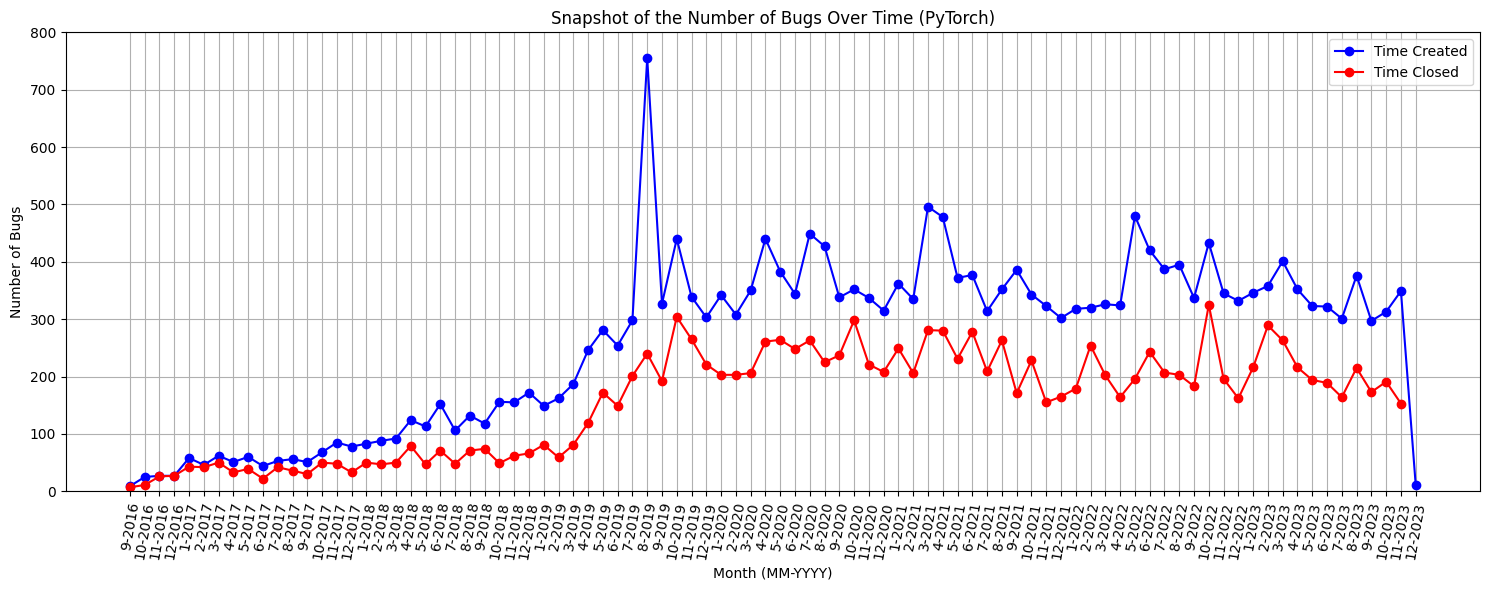

In [176]:
import pandas as pd

# Assuming df_sorted is already sorted by 'Time created'
df_torch_sorted['Time created'] = pd.to_datetime(df_torch_sorted['Time created'])
df_torch_sorted['Time closed'] = pd.to_datetime(df_torch_sorted['Time closed'])

# Group by year and month and count the number of bugs for each month
bugs_per_month_created = df_torch_sorted[df_torch_sorted['Final_Is_Bug'] == 1].groupby([df_torch_sorted['Time created'].dt.year, df_torch_sorted['Time created'].dt.month]).size()
bugs_per_month_closed = df_torch_sorted[df_torch_sorted['Final_Is_Bug'] == 1].groupby([df_torch_sorted['Time closed'].dt.year, df_torch_sorted['Time closed'].dt.month]).size()

# Create subplots
fig, ax = plt.subplots(figsize=(15, 6))

# Plotting the bug evolution over time for Time Created
x_values_created = [f'{month}-{year}' for year, month in bugs_per_month_created.index]
y_values_created = bugs_per_month_created.values
ax.plot(x_values_created, y_values_created, marker='o', color='blue', label='Time Created')

# Plotting the bug evolution over time for Time Closed
x_values_closed = [f'{int(month)}-{int(year)}' for year, month in bugs_per_month_closed.index]
y_values_closed = bugs_per_month_closed.values
ax.plot(x_values_closed, y_values_closed, marker='o', color='red', label='Time Closed')

# Set titles and labels
ax.set_title('Snapshot of the Number of Bugs Over Time (PyTorch)')
ax.set_xlabel('Month (MM-YYYY)')
ax.set_ylabel('Number of Bugs')
ax.grid(True)
ax.legend()

#rotate
plt.xticks(rotation=80)
plt.ylim(0, 800)
plt.tight_layout()
plt.show()


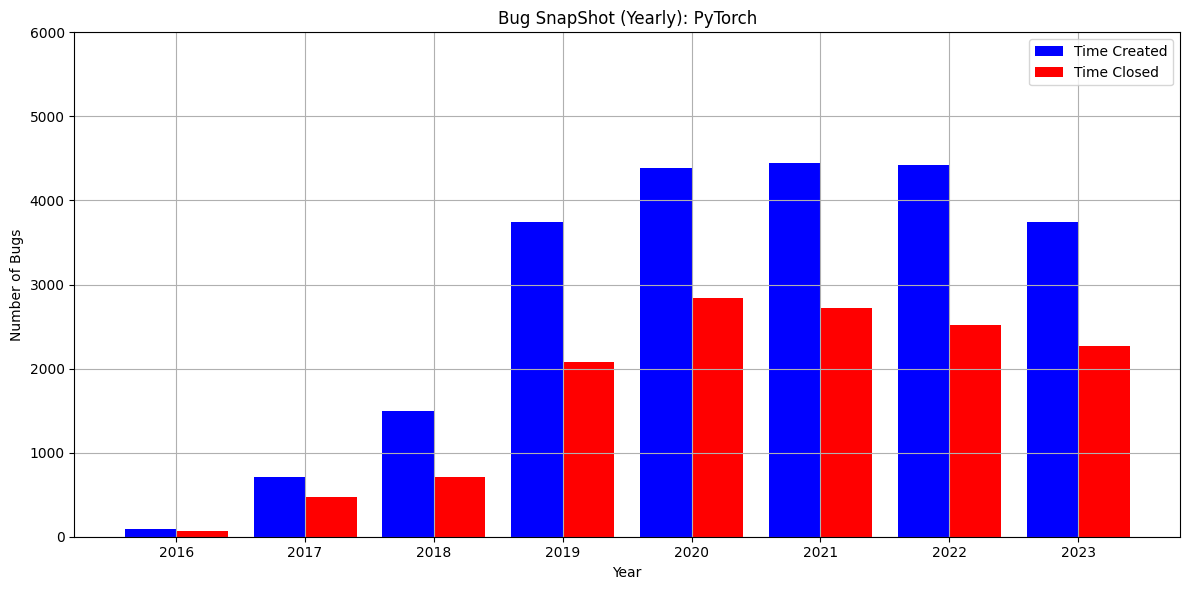

In [177]:
# Assuming df_sorted is already sorted by 'Time created'
df_torch_sorted['Time created'] = pd.to_datetime(df_torch_sorted['Time created'])
df_torch_sorted['Time closed'] = pd.to_datetime(df_torch_sorted['Time closed'])

# Group by year and count the number of bugs for each year
bugs_per_year_created = df_torch_sorted[df_torch_sorted['Final_Is_Bug'] == 1].groupby(df_torch_sorted['Time created'].dt.year).size()
bugs_per_year_closed = df_torch_sorted[df_torch_sorted['Final_Is_Bug'] == 1].groupby(df_torch_sorted['Time closed'].dt.year).size()

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the bug evolution over time for Time Created
x_values_created = bugs_per_year_created.index
y_values_created = bugs_per_year_created.values
ax.bar(x_values_created - 0.2, y_values_created, width=0.4, color='blue', label='Time Created')

# Plotting the bug evolution over time for Time Closed
x_values_closed = bugs_per_year_closed.index
y_values_closed = bugs_per_year_closed.values
ax.bar(x_values_closed + 0.2, y_values_closed, width=0.4, color='red', label='Time Closed')

# Set titles and labels
ax.set_title('Bug SnapShot (Yearly): PyTorch')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Bugs')
ax.grid(True)
ax.legend()
plt.ylim(0, 6000)
plt.tight_layout()
plt.show()


## Graph for All Issues vs Resolved Ones in TensorFlow

In [178]:
#Graph the number of bugs over time
df_tf['Time created'] = pd.to_datetime(df_tf['Time created'])
df_tf['Time created'] = df_tf['Time created'].dt.strftime('%Y-%m-%d')
df_tf['Final_Is_Bug'] = df_tf['Final_Is_Bug'].astype(int)
df_tf['Time closed'] = pd.to_datetime(df_tf['Time closed']).dt.strftime('%Y-%m-%d')

df_tf.drop_duplicates()
df_tf_sorted = df_tf.sort_values(by=['Time created'])
df_tf_sorted = df_tf_sorted.reset_index(drop=True)

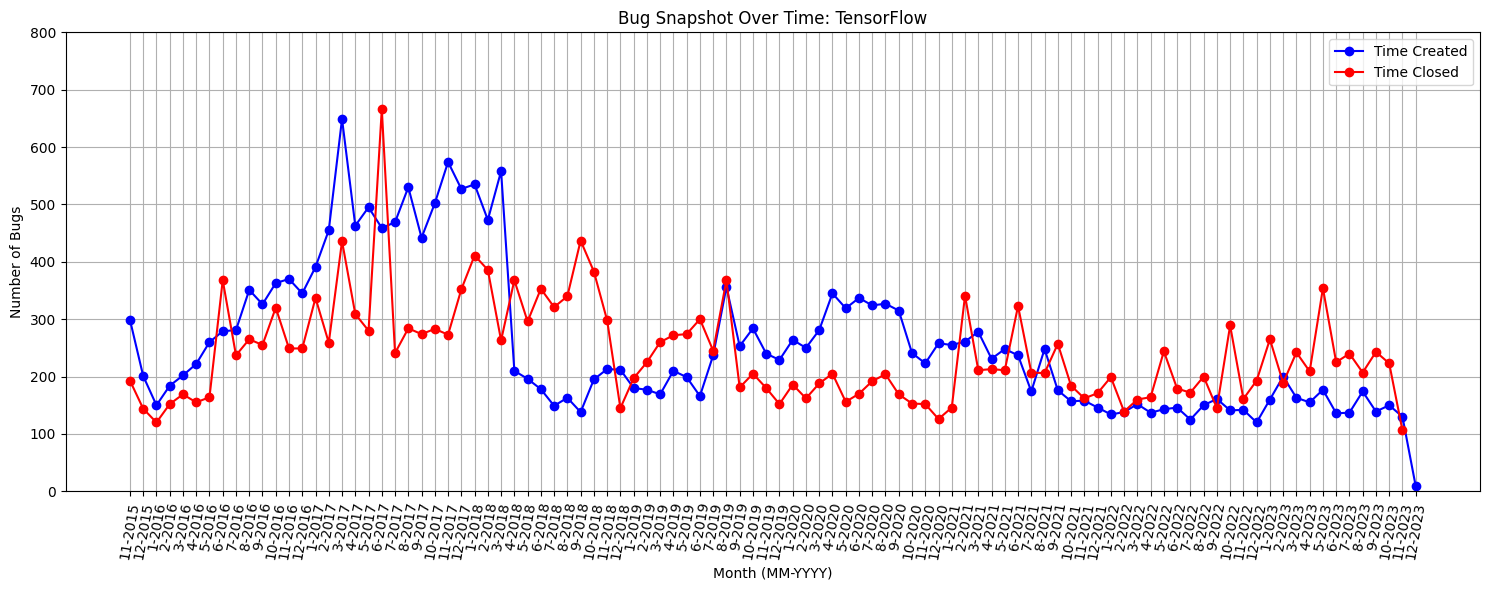

In [179]:
import pandas as pd

# Assuming df_sorted is already sorted by 'Time created'
df_tf_sorted['Time created'] = pd.to_datetime(df_tf_sorted['Time created'])
df_tf_sorted['Time closed'] = pd.to_datetime(df_tf_sorted['Time closed'])

# Group by year and month and count the number of bugs for each month
bugs_per_month_created = df_tf_sorted[df_tf_sorted['Final_Is_Bug'] == 1].groupby([df_tf_sorted['Time created'].dt.year, df_tf_sorted['Time created'].dt.month]).size()
bugs_per_month_closed = df_tf_sorted[df_tf_sorted['Final_Is_Bug'] == 1].groupby([df_tf_sorted['Time closed'].dt.year, df_tf_sorted['Time closed'].dt.month]).size()

# Create subplots
fig, ax = plt.subplots(figsize=(15, 6))

# Plotting the bug evolution over time for Time Created
x_values_created = [f'{month}-{year}' for year, month in bugs_per_month_created.index]
y_values_created = bugs_per_month_created.values
ax.plot(x_values_created, y_values_created, marker='o', color='blue', label='Time Created')

# Plotting the bug evolution over time for Time Closed
x_values_closed = [f'{int(month)}-{int(year)}' for year, month in bugs_per_month_closed.index]
y_values_closed = bugs_per_month_closed.values
ax.plot(x_values_closed, y_values_closed, marker='o', color='red', label='Time Closed')

# Set titles and labels
ax.set_title('Bug Snapshot Over Time: TensorFlow')
ax.set_xlabel('Month (MM-YYYY)')
ax.set_ylabel('Number of Bugs')
ax.grid(True)
ax.legend()

#rotate
plt.ylim(0, 800)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()


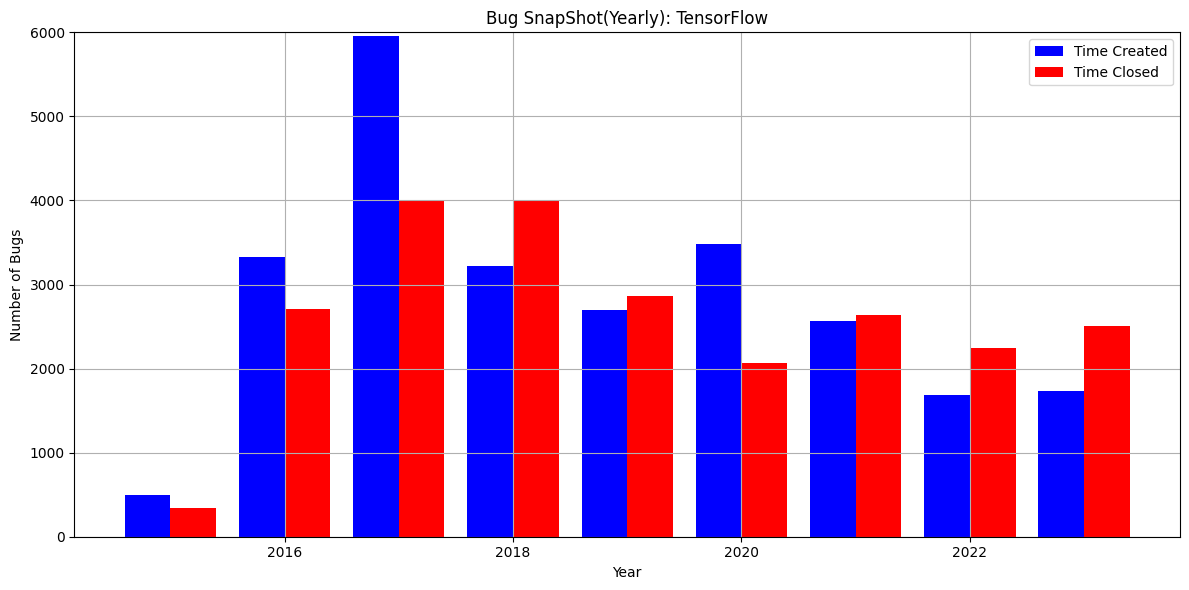

In [180]:
# Assuming df_sorted is already sorted by 'Time created'
df_tf_sorted['Time created'] = pd.to_datetime(df_tf_sorted['Time created'])
df_tf_sorted['Time closed'] = pd.to_datetime(df_tf_sorted['Time closed'])

# Group by year and count the number of bugs for each year
bugs_per_year_created = df_tf_sorted[df_tf_sorted['Final_Is_Bug'] == 1].groupby(df_tf_sorted['Time created'].dt.year).size()
bugs_per_year_closed = df_tf_sorted[df_tf_sorted['Final_Is_Bug'] == 1].groupby(df_tf_sorted['Time closed'].dt.year).size()

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the bug evolution over time for Time Created
x_values_created = bugs_per_year_created.index
y_values_created = bugs_per_year_created.values
ax.bar(x_values_created - 0.2, y_values_created, width=0.4, color='blue', label='Time Created')

# Plotting the bug evolution over time for Time Closed
x_values_closed = bugs_per_year_closed.index
y_values_closed = bugs_per_year_closed.values
ax.bar(x_values_closed + 0.2, y_values_closed, width=0.4, color='red', label='Time Closed')

# Set titles and labels
ax.set_title('Bug SnapShot(Yearly): TensorFlow')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Bugs')
ax.grid(True)
ax.legend()
plt.ylim(0, 6000)

plt.tight_layout()
plt.show()
